### *Timeseries*
---

<br />

*Imports, consts*

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Numpy version: 1.22.1


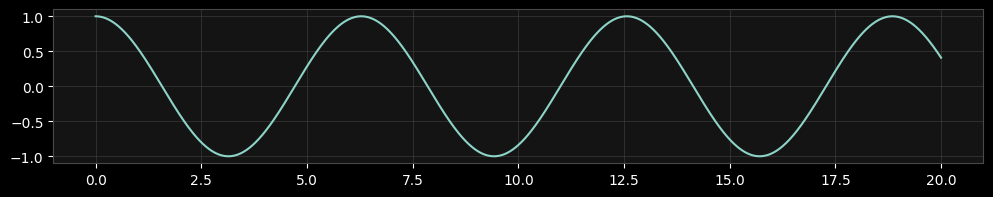

In [2]:
import sys
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)
rg = np.random.default_rng()
print(f"Numpy version: {np.__version__}")

plt.rcdefaults()
plt.style.use("dark_background")
plt.rcParams.update({
    "axes.edgecolor": "#494949",
    "axes.facecolor": "#141414",
    #"figure.facecolor": "#262626",
    "axes.grid": "true",
    "grid.color": "#494949",
    "grid.linewidth": 0.4,
    "grid.alpha": 0.9,
})

x = np.linspace(0, 20, 1000)
y = np.cos(x)
plt.figure(figsize=(12, 2))
plt.plot(x, y)
plt.show()

<br />

# Prices
---
- Spot, Perpetual, Future

<br />

### Utils
---

In [3]:
def get_random_walk(n: int = 100, init_value: float = 0) -> np.array:
    '''Brownian motion

    Params:
    - n: int            = 100
      * Above 30 steps advised
    - init_value: float = 0
    '''
    w = np.ones(n) * init_value
    for i in range(1, n):
        yi = rg.choice([1, -1])            # Normal distrib, 0.5
        w[i] = w[i-1] + (yi / np.sqrt(n))  # Weiner process
    return w


def get_weights(n: int) -> np.array:
    n1 = 1 * n // 8
    n2 = n - n1 * 7
    return np.concatenate(
        (
            np.linspace(0.0,  1.5,  n1),
            np.linspace(1.5,  0.5,  n1+1)[1:],
            np.linspace(0.5,  1.0,  n1+1)[1:],
            np.linspace(1.0,  0.5,  n1+1)[1:],
            np.linspace(0.5,  0.25, n1+1)[1:],
            np.linspace(0.25, 0.5,  n1+1)[1:],
            np.linspace(0.5,  0.25, n1+1)[1:],
            np.linspace(0.25, 0.0,  n2+1)[1:]
        ),
        axis=None
    )


def get_prices(n: int, price_init: float, price_last: float) -> np.array:
    '''Get prices

    Params:
    - n: int, array length
    - price_init: float
    - price_last: float
    '''
    walk = get_random_walk(n, 0)
    prices = np.linspace(price_init, price_last, n)
    weights = get_weights(n)
    return np.array([p + (walk[i]*5_000)*weights[i] for i, p in enumerate(prices)])


def get_prices_perp(n: int, prices: np.array, avg_dir: Optional[float] = 0) -> np.array:
    '''Get new prices with shifted values

    Params:
    - prices: np.array
    - avg_dir: Optional[float] = 0
    '''
    walk = get_random_walk(n, 0)
    weights = get_weights(n)
    return np.array([p + (walk[i]*1_000)*weights[i] + (avg_dir * 100) for i, p in enumerate(prices)])


def get_prices_futr(prices: np.array, init_shift: float) -> np.array:
    '''Get new prices with shifted init value to convergence

    Params:
    - prices: np.array
    - init_shift: float
    '''
    new_p = prices.copy()
    init_diff = init_shift - new_p[0]
    for i, p in enumerate(prices):
        new_p[i] = new_p[i] + (init_diff - (init_diff * (i / len(new_p))))
    return new_p

<br />

### Uptrend, backwardation to convergence
---

[]

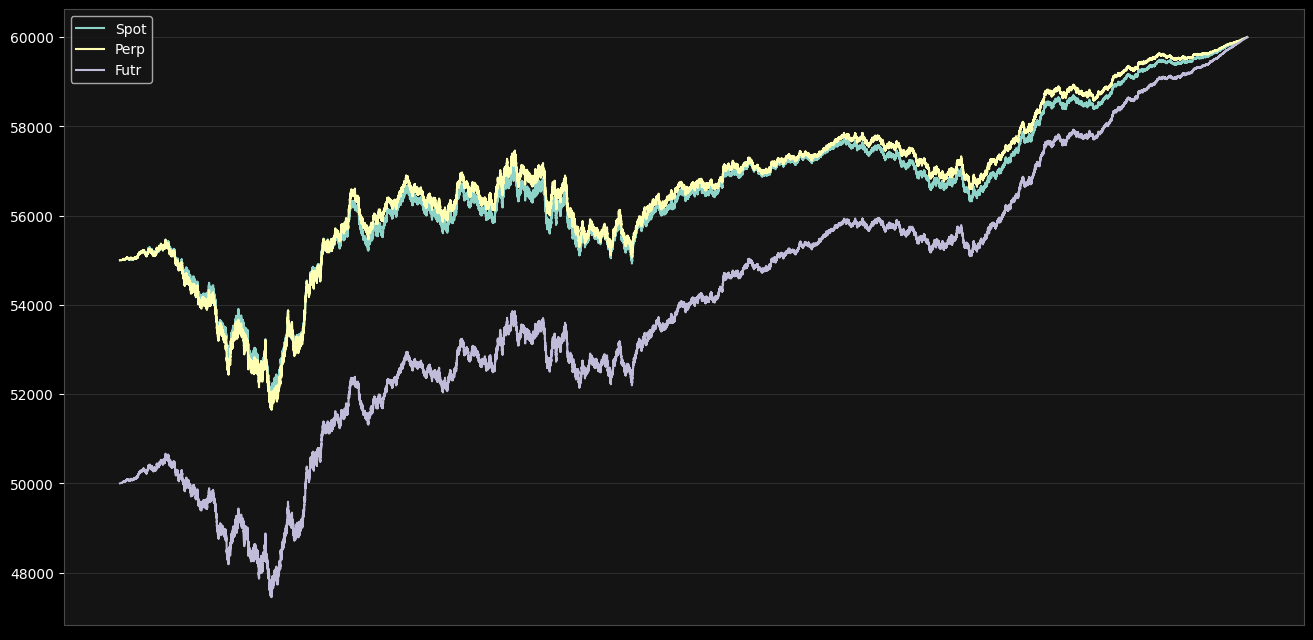

In [4]:
idxs = 100_000
spot = get_prices(idxs, 55_000, 60_000)
perp = get_prices_perp(idxs, spot)
futr = get_prices_futr(spot, 50_000)

x = np.arange(0, idxs)
plt.figure(figsize=(16, 8))
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=6, colspan=1)
ax1.plot(x, spot, label="Spot")
ax1.plot(x, perp, label="Perp")
ax1.plot(x, futr, label="Futr")
ax1.set_xticks([])
ax1.legend()
plt.plot()

<br />

### Uptrend, contango to convergence
---

[]

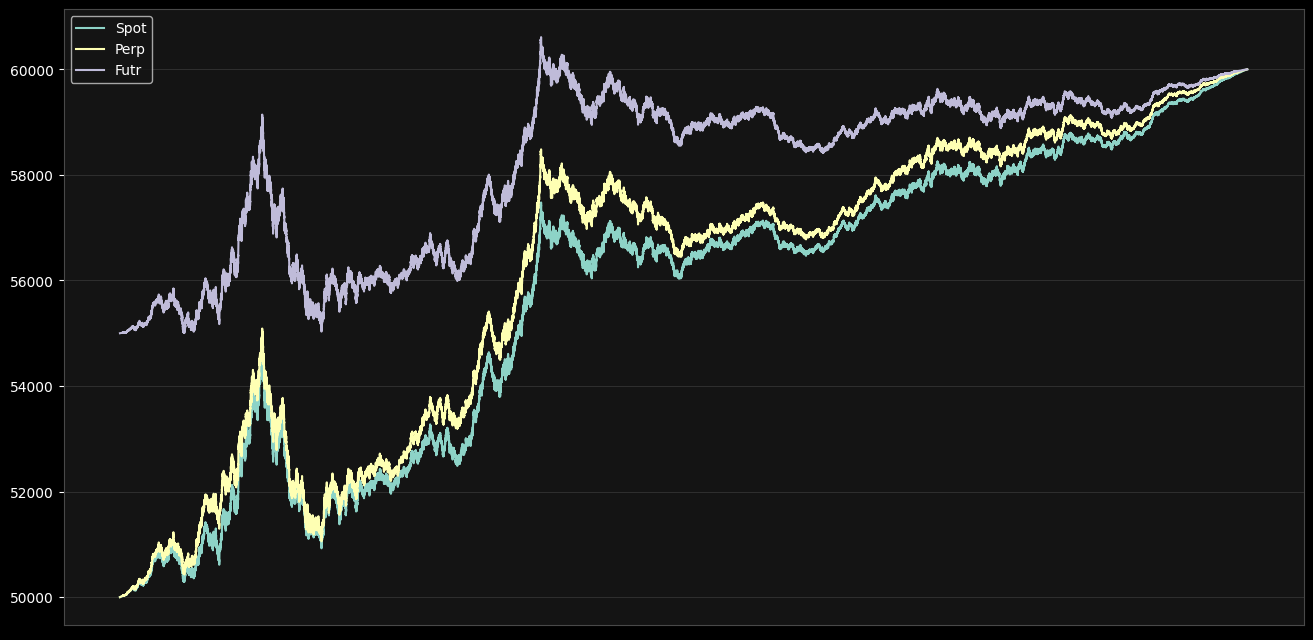

In [5]:
idxs = 100_000
spot = get_prices(idxs, 50_000, 60_000)
perp = get_prices_perp(idxs, spot)
futr = get_prices_futr(spot, 55_000)

x = np.arange(0, idxs)
plt.figure(figsize=(16, 8))
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=6, colspan=1)
ax1.plot(x, spot, label="Spot")
ax1.plot(x, perp, label="Perp")
ax1.plot(x, futr, label="Futr")
ax1.set_xticks([])
ax1.legend()
plt.plot()

<br />

### Downtrend, backwardation to convergence
---

[]

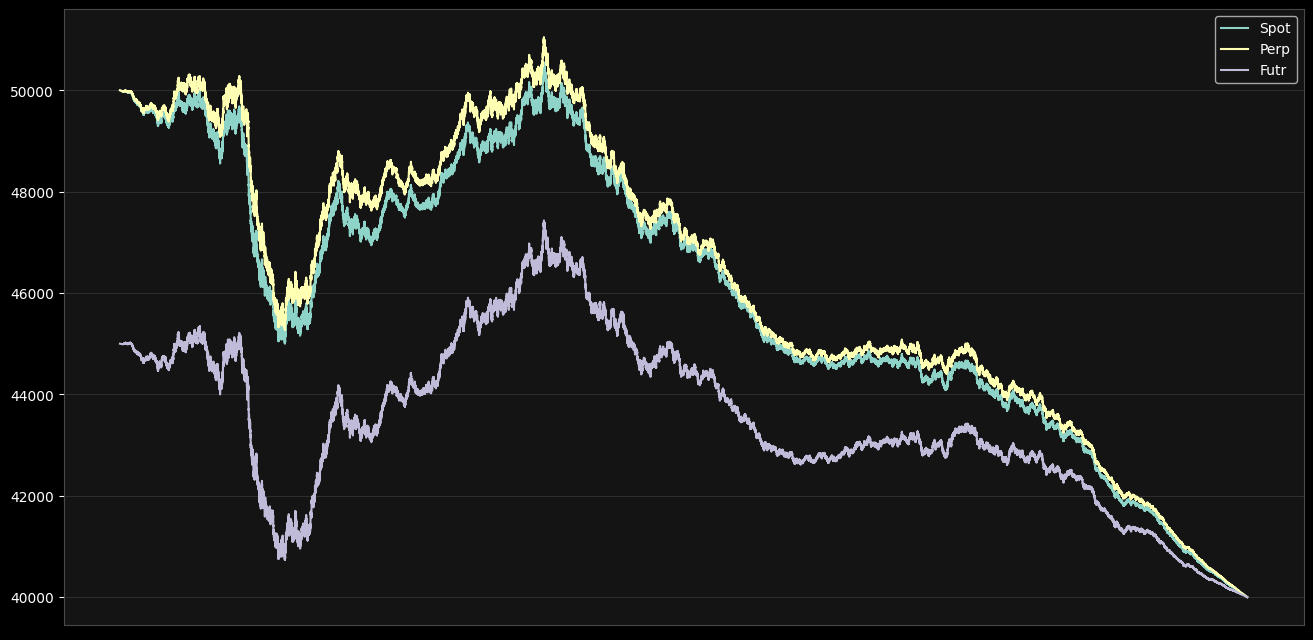

In [6]:
idxs = 100_000
spot = get_prices(idxs, 50_000, 40_000)
perp = get_prices_perp(idxs, spot)
futr = get_prices_futr(spot, 45_000)

x = np.arange(0, idxs)
plt.figure(figsize=(16, 8))
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=6, colspan=1)
ax1.plot(x, spot, label="Spot")
ax1.plot(x, perp, label="Perp")
ax1.plot(x, futr, label="Futr")
ax1.set_xticks([])
ax1.legend()
plt.plot()

<br />

### Downtrend, contango to convergence
---

[]

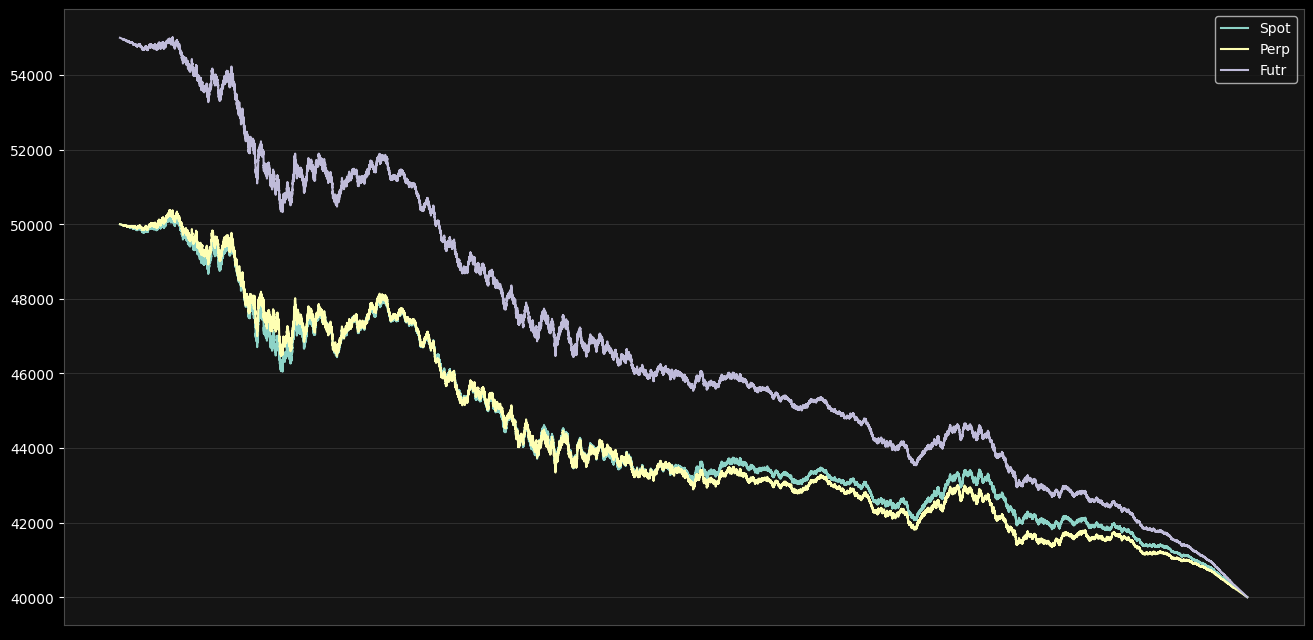

In [7]:
idxs = 100_000
spot = get_prices(idxs, 50_000, 40_000)
perp = get_prices_perp(idxs, spot)
futr = get_prices_futr(spot, 55_000)

x = np.arange(0, idxs)
plt.figure(figsize=(16, 8))
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=6, colspan=1)
ax1.plot(x, spot, label="Spot")
ax1.plot(x, perp, label="Perp")
ax1.plot(x, futr, label="Futr")
ax1.set_xticks([])
ax1.legend()
plt.plot()

<br />

### Range
---

[]

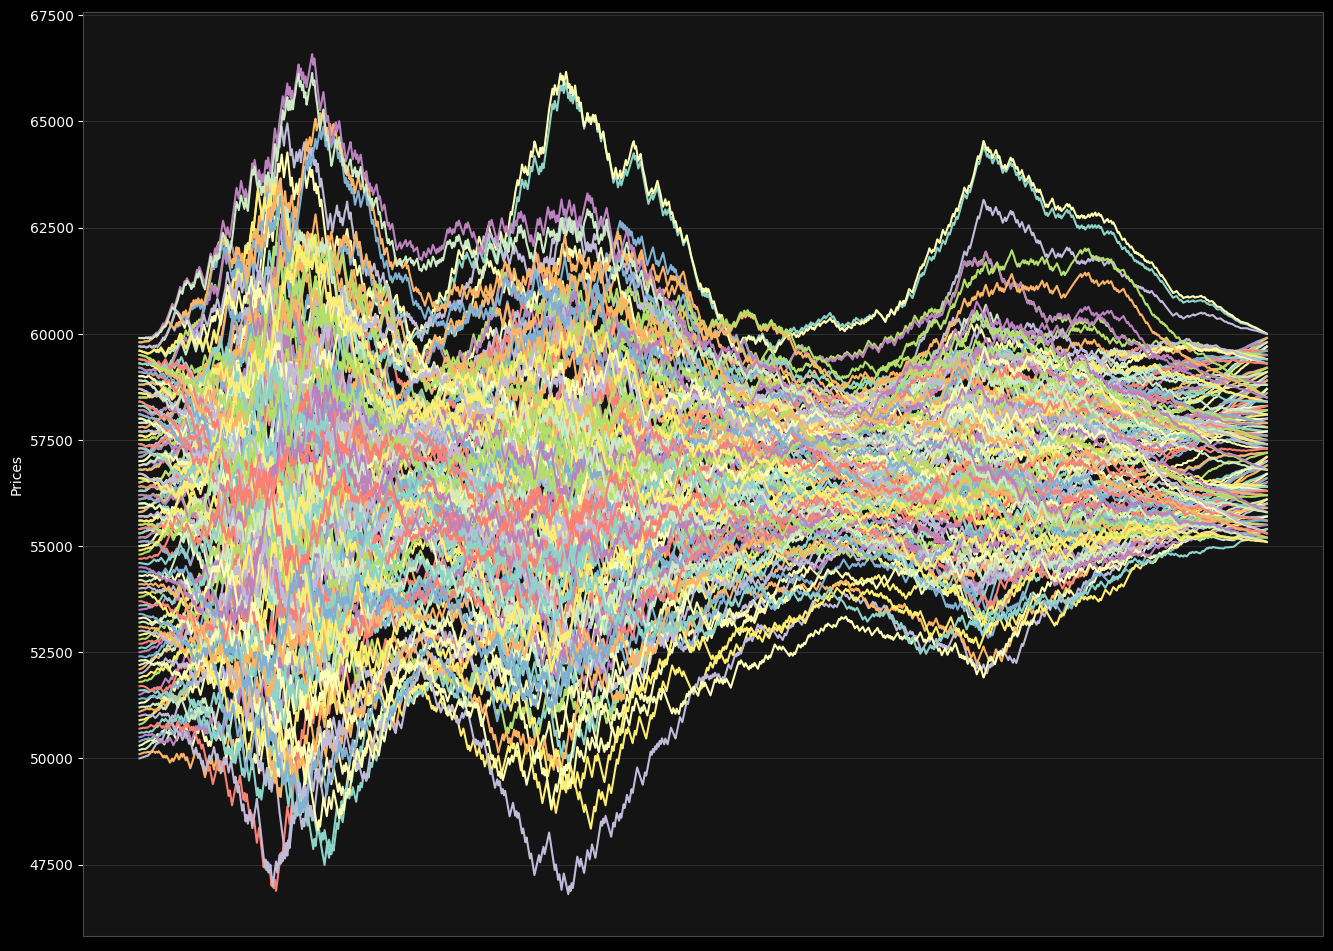

In [8]:
idxs = 1_000
spot_init = 55_000
spot_last = 60_000
futr_init = 50_000

spot = []
perp = []
futr = []
for i, p_diff in enumerate(range(0, spot_last - spot_init, 100)):
    spot.append(get_prices(idxs, spot_init+p_diff, spot_last-p_diff))
    perp.append(get_prices_perp(idxs, spot[i]))
    futr.append(get_prices_futr(spot[i], futr_init+p_diff))

x = np.arange(0, idxs)
plt.figure(figsize=(16, 12))
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=6, colspan=1)
ax1.set_ylabel("Prices")

for i, s in enumerate(spot):
    p = perp[i]
    f = futr[i]
    ax1.plot(x, s)
    ax1.plot(x, p)
    ax1.plot(x, f)
    ax1.set_xticks([])

plt.plot()

<br />